<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

**Import and Validate**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats

In [3]:
csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

names = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Approved']

df = pd.read_csv(csv, header=None, names=names)

print('DataFrame shape:',df.shape)

df.head()

DataFrame shape: (690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+




---



**Encoding and Typecasting**

In [4]:
df.dtypes

A1           object
A2           object
A3          float64
A4           object
A5           object
A6           object
A7           object
A8          float64
A9           object
A10          object
A11           int64
A12          object
A13          object
A14          object
A15           int64
Approved     object
dtype: object

In [0]:
cont_columns = ['A2','A14']
for _ in cont_columns:
  df[_] = df[_].replace({'?': np.NaN})
  df[_] = df[_].astype(float)

In [6]:
df.dtypes

A1           object
A2          float64
A3          float64
A4           object
A5           object
A6           object
A7           object
A8          float64
A9           object
A10          object
A11           int64
A12          object
A13          object
A14         float64
A15           int64
Approved     object
dtype: object

In [7]:
df.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,Approved
count,690,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [8]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [9]:
df['Approved'].value_counts()

-    383
+    307
Name: Approved, dtype: int64

In [0]:
df['A1'] = df['A1'].replace({'?': np.NaN})
df['A4'] = df['A4'].replace({'?': np.NaN})
df['A5'] = df['A5'].replace({'?': np.NaN})
df['A6'] = df['A6'].replace({'?': np.NaN})
df['A7'] = df['A7'].replace({'?': np.NaN})

df['A9'] = df['A9'].replace({'t': 1, 'f': 0})
df['A10'] = df['A10'].replace({'t': 1, 'f': 0})
df['A12'] = df['A12'].replace({'t': 1, 'f': 0})

df['Approved'] = df['Approved'].replace({'+': 1, '-': 0})



---



**Create Approved and Rejected DataFrames**

In [11]:
df = df.sort_values(by = 'Approved')
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approved
152,b,37.33,6.5,u,g,m,h,4.250,1,1,12,1,g,93.0,0,1
153,b,23.08,2.5,u,g,c,v,1.085,1,1,11,1,g,60.0,2184,1
154,b,32.75,1.5,u,g,cc,h,5.500,1,1,3,1,g,0.0,0,1
146,b,23.25,1.5,u,g,q,v,2.375,1,1,3,1,g,0.0,582,1
0,b,30.83,0.0,u,g,w,v,1.250,1,1,1,0,g,202.0,0,1


In [0]:
approved = df.iloc[383:]
rejected = df.iloc[:383]

In [20]:
print(approved.shape)
approved.head()

(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approved
569,a,35.75,0.915,u,g,aa,v,0.750,1,1,4,0,g,0.0,1583,1
568,b,43.08,0.375,y,p,c,v,0.375,1,1,8,1,g,300.0,162,1
567,a,25.17,2.875,u,g,x,h,0.875,1,0,0,0,g,360.0,0,1
12,a,38.25,6.000,u,g,k,v,1.000,1,0,0,1,g,0.0,0,1
575,b,32.25,0.165,y,p,c,h,3.250,1,1,1,1,g,432.0,8000,1


In [22]:
approved['Approved'].value_counts()

1    307
Name: Approved, dtype: int64

In [21]:
print(rejected.shape)
rejected.head()

(383, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Approved
344,b,38.92,1.750,u,g,k,v,0.500,0,0,0,1,g,300.0,2,0
398,b,26.17,12.500,y,p,k,h,1.250,0,0,0,1,g,0.0,17,0
399,b,31.00,2.085,u,g,c,v,0.085,0,0,0,0,g,300.0,0,0
400,b,20.75,5.085,y,p,j,v,0.290,0,0,0,0,g,140.0,184,0
401,b,28.92,0.375,u,g,c,v,0.290,0,0,0,0,g,220.0,140,0


In [23]:
rejected['Approved'].value_counts()

0    383
Name: Approved, dtype: int64

In [0]:
numeric_cols = ['A2','A3','A8','A11','A14','A15', 'A9', 'A10', 'A12']



---



## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

**Scatter Matricies**

In [0]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [0]:
sns.pairplot(approved, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [0]:
sns.pairplot(rejected, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})



---



**Explore Means**

In [48]:
approved.describe().T['mean']

A2            33.720492
A3             5.904951
A8             3.427899
A9             0.925081
A10            0.680782
A11            4.605863
A12            0.475570
A14          164.421927
A15         2038.859935
Approved       1.000000
Name: mean, dtype: float64

In [49]:
rejected.describe().T['mean']

A2           29.808231
A3            3.839948
A8            1.257924
A9            0.201044
A10           0.224543
A11           0.631854
A12           0.443864
A14         199.699468
A15         198.605744
Approved      0.000000
Name: mean, dtype: float64

In [71]:
a = np.array(approved.describe().T['mean'][:9])
r = np.array(rejected.describe().T['mean'][:9])
print('Difference in means')
for _ in range(9):
  print(numeric_cols[_], a[_] - r[_])

difference in means
A2 3.912261240276017
A3 2.065003359386295
A8 2.1699747408169685
A11 0.7240370468017792
A14 0.4562386780177069
A15 3.9740094062816276
A9 0.03170580280827684
A10 -35.277541174807396
A12 1840.2541907280938




---



**T-Tests**

In [0]:
from scipy import stats

def double_t_test(issue):

  """This is a two-sided test for the null hypothesis that 2 independent
     samples have identical average values"""
  
  # Test function from scipy
  two_sided_test = stats.ttest_ind

  # Sample A: Aproved
  App = approved[issue]

  # Sample B: Rejected
  Rej = rejected[issue]

  # Run T test
  stat = two_sided_test(App, Rej, nan_policy='omit')
  
  return stat

In [105]:
t_test_results = []

for _ in numeric_cols:
  t_test_results.append(double_t_test(_)[0])
  if double_t_test(_)[1] < .05:
    print('\n', _ , '\nt statistic',double_t_test(_)[0], '\np-value',double_t_test(_)[1], '\nReject Null')
  else:
    print('\n', _ , '\nt statistic',double_t_test(_)[0], '\np-value',double_t_test(_)[1], '\nFail to Reject Null')
  


 A2 
t statistic 4.2922156166315455 
p-value 2.0276637071781407e-05 
Reject Null

 A3 
t statistic 5.52998337614816 
p-value 4.551680702308068e-08 
Reject Null

 A8 
t statistic 8.935819983773705 
p-value 3.67105374015994e-18 
Reject Null

 A11 
t statistic 11.667004222431277 
p-value 7.957718568079967e-29 
Reject Null

 A14 
t statistic -2.6358251986645476 
p-value 0.008586135473979569 
Reject Null

 A15 
t statistic 4.680216020964487 
p-value 3.4520256956287804e-06 
Reject Null

 A9 
t statistic 27.245398535467626 
p-value 1.9368208799737266e-111 
Reject Null

 A10 
t statistic 13.52517266303669 
p-value 3.941258302842775e-37 
Reject Null

 A12 
t statistic 0.8299262276960955 
p-value 0.4068683677059408 
Fail to Reject Null




---



**Plot t-test Results**

In [0]:
Acc = []
Rej = []

for i in (t_test_results):
  if i >=0:
    Acc.append(i)
  else:
    Acc.append(0)
    
    
for i in (t_test_results):
  if i < 0:
    Rej.append(i)
  else:
    Rej.append(0)

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10

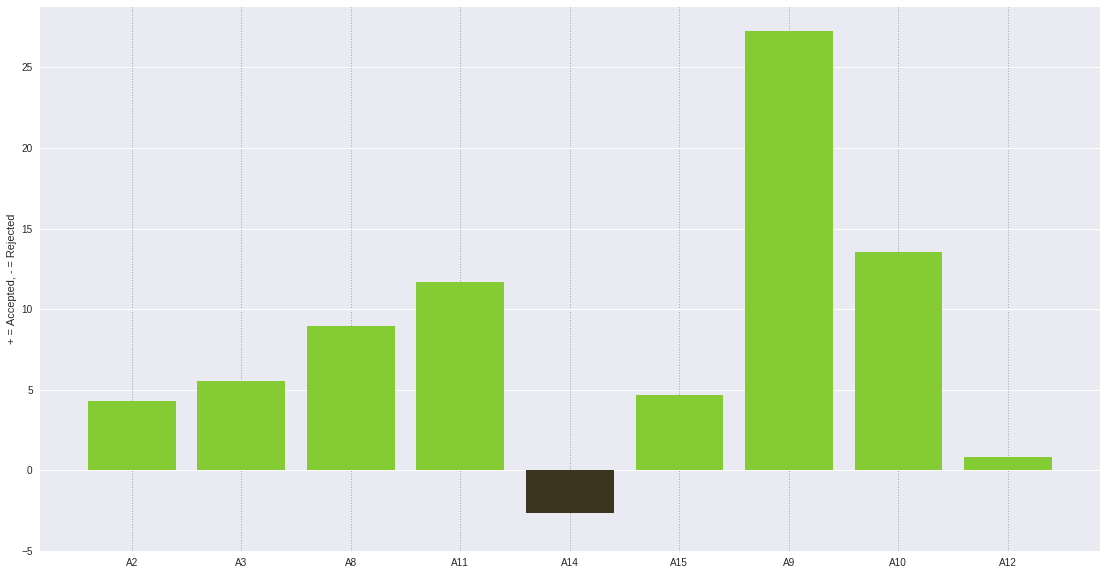

In [112]:
N = 16
import matplotlib.pyplot as plt

# the x locations for the groups
ind = np.arange(N)
# the width of the bars: can also be len(x) sequence
width = 0.8      

# Bars for surplus
p1 = plt.bar(numeric_cols, Acc, width, color='#85CB33')

# Bars for deficit
p2 = plt.bar(numeric_cols, Rej, width, color ='#3B341F')

plt.ylabel('+ = Accepted, - = Rejected')
plt.xticks(numeric_cols)
plt.yticks(np.arange(-5, 30, 5))
plt.grid(b=True, which='major', axis='x',color='black', linestyle=':', linewidth=1, alpha=.3)
plt.show()



---



**Chi-Squared Tests**

In [0]:
cat_cols= ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [116]:
for _ in cat_cols:
  print('\n', _ ,
        '\nchi statistic',
        chisquare(pd.crosstab(df['Approved'], df[_]), axis=None)[0],
        '\np-value',
        chisquare(pd.crosstab(df['Approved'], df[_]), axis=None)[1],)


 A1 
chi statistic 108.00589970501476 
p-value 2.9474557158762434e-23

 A4 
chi statistic 637.561403508772 
p-value 1.545055409454076e-135

 A5 
chi statistic 637.561403508772 
p-value 1.545055409454076e-135

 A6 
chi statistic 393.32011747430255 
p-value 1.1436746143425653e-66

 A7 
chi statistic 1855.9427312775329 
p-value 0.0

 A9 
chi statistic 357.82608695652175 
p-value 3.01326407188219e-77

 A10 
chi statistic 173.1304347826087 
p-value 2.6842170765821316e-37

 A12 
chi statistic 14.382608695652173 
p-value 0.0024280203352694887

 A13 
chi statistic 1037.2695652173913 
p-value 5.124924990548949e-222




---



**Visualize Chi-Squared Results**

A7

In [149]:
# Calculate our contingency table with margins
a7_cont = pd.crosstab(
    df['Approved'],
    df['A7'],
    normalize='columns')

a7_cont

A7,bb,dd,ff,h,j,n,o,v,z
Approved,,,,,,,,,
0,0.576271,0.666667,0.859649,0.369565,0.625,0.5,0.5,0.576441,0.25
1,0.423729,0.333333,0.140351,0.630435,0.375,0.5,0.5,0.423559,0.75


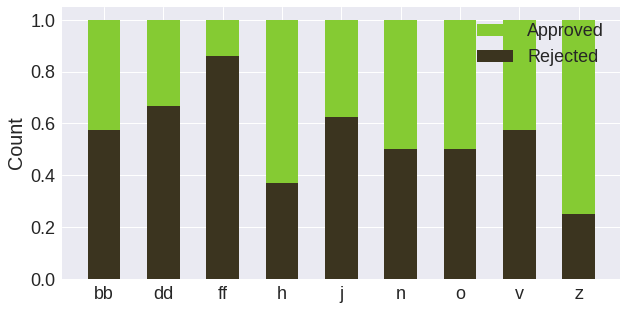

In [154]:
#Assigns the frequency values
ap = a7_cont.iloc[1][0:9].values
re = a7_cont.iloc[0][0:9].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)

categories = ['bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z']

p1 = plt.bar(categories, re, 0.55, color='#3B341F')
p2 = plt.bar(categories, ap, 0.55, bottom=re, color='#85CB33')

plt.legend((p2[0], p1[0]), ('Approved', 'Rejected'))
plt.ylabel('Count')
plt.show()



---



A4

In [141]:
# Calculate our contingency table with margins
a4_cont = pd.crosstab(
    df['Approved'],
    df['A4'],
    normalize='columns')

a4_cont

A4,l,u,y
Approved,,,
0,0.0,0.506744,0.723926
1,1.0,0.493256,0.276074


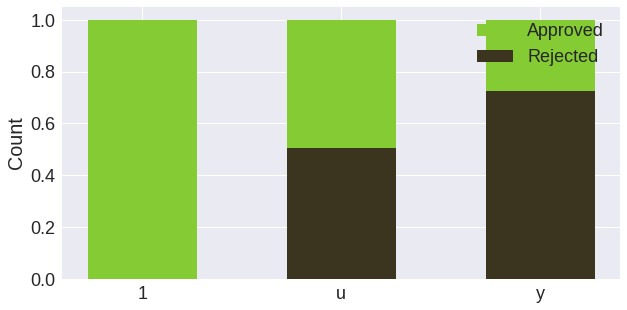

In [147]:
#Assigns the frequency values
ap = a4_cont.iloc[1][0:3].values
re = a4_cont.iloc[0][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)

categories = ['1','u', 'y']

p1 = plt.bar(categories, re, 0.55, color='#3B341F')
p2 = plt.bar(categories, ap, 0.55, bottom=re, color='#85CB33')

plt.legend((p2[0], p1[0]), ('Approved', 'Rejected'))
plt.ylabel('Count')
plt.show()



---



A13

In [139]:
# Calculate our contingency table with margins
a13_cont = pd.crosstab(
    df['Approved'],
    df['A13'],
    normalize='columns')

a13_cont

A13,g,p,s
Approved,,,
0,0.5408,0.375,0.736842
1,0.4592,0.625,0.263158


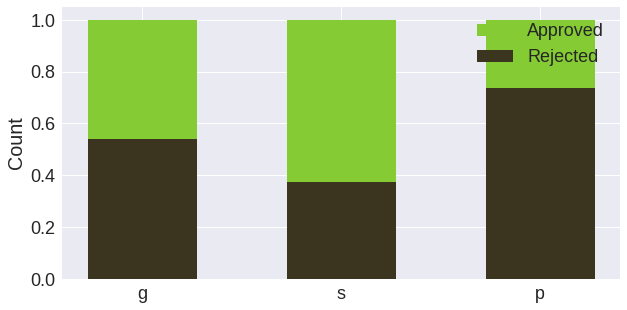

In [155]:
#Assigns the frequency values
ap = a13_cont.iloc[1][0:3].values
re = a13_cont.iloc[0][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))

categories = ['g', 's', 'p']

p1 = plt.bar(categories, re, 0.55, color='#3B341F')
p2 = plt.bar(categories, ap, 0.55, bottom=re, color='#85CB33')

plt.legend((p2[0], p1[0]), ('Approved', 'Rejected'))
plt.ylabel('Count')
plt.show()



---



## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**t-test Interpretation**

A9 value = 't' is correlated with approval



---



**Chi Squared Interpretation**

A13 value = 'p' correlated with rejection

A13 value = 's' correlated with approval

A7 = 'ff' correlated with rejection

A7 = 'z' correlated with approval

A4 = 'y' correlated with rejection



---



**Most Challenging Part of Sprint Challenge**

For me the most challenging part of this sprint challenge is the Interpretation. I feel fairly confident with cleaning my data, implimenting the tests, and visualizing the results, but I still have to think quite hard about my test results meaning in the context of the problem.



---

